In [58]:
import pandas as pd
df = pd.read_csv('sample_tweets_cleaned.csv')

In [60]:
df.head()

,Unnamed: 0,sentiment_category,text
0,1,negative,I can’t remember who but fake media was quotin...
1,2,negative,This type of conspiracy based misinformation i...
2,3,negative,pressley Your mayor is corrupt. His own daugh...
3,4,negative,It is what it is. - Donald Trump regarding Ame...
4,5,negative,Remember when you were calling the Covid virus...


In [61]:
df['sentiment_category'] = df['sentiment_category'].apply(lambda x: 1 if x == 'negative' else 0)

In [62]:
df['sentiment_category'].value_counts(normalize=True)

1    0.683565
0    0.316435
Name: sentiment_category, dtype: float64

In [63]:
from sklearn.model_selection import train_test_split
X = df['text']
y = df['sentiment_category']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pranavtalwar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [66]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [67]:
def tokenizer(text):
    return text.split()

In [68]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV


tfidf = TfidfVectorizer(strip_accents=None, lowercase=True, preprocessor=None)
param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              ]
lr_tfidf = Pipeline([('vect', tfidf), ('clf', LogisticRegression(random_state=0, solver='liblinear'))])
lr_gs_cv = GridSearchCV(lr_tfidf, param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
lr_gs_cv.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('clf',
                                        LogisticRegression(random_state=0,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [1.0, 10.0, 100.0],
                          'clf__penalty': ['l1', 'l2'],
                          'vect__ngram_range': [(1, 1)],
                          'vect__stop_words': [['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you...
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd",

In [70]:
print('Best parameter set: %s ' % lr_gs_cv.best_params_)
print('CV Accuracy: %.3f' % lr_gs_cv.best_score_)

Best parameter set: {'clf__C': 1.0, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 1), 'vect__norm': None, 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer_porter at 0x1a3696f7b8>, 'vect__use_idf': False} 
CV Accuracy: 0.826


In [71]:
clf = lr_gs_cv.best_estimator_
print('Test Accuracy: %.3f' % clf.score(X_test, y_test))

Test Accuracy: 0.828


In [72]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV


tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None)
param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'svc__C': [1.0, 10.0, 100.0],
               'svc__kernel': ['linear', 'rbf', 'poly'],
              },
              {'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'svc__C': [1.0, 10.0, 100.0],
               'svc__kernel': ['linear', 'rbf', 'poly']}]
svc_tfidf = Pipeline([('vect', tfidf), ('svc', SVC(kernel='linear', C=1, random_state=1))])
svc_gs_cv = GridSearchCV(svc_tfidf, param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
svc_gs_cv.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/Users/pranavtalwar/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('svc',
                                        SVC(C=1, kernel='linear',
                                            random_state=1))]),
             n_jobs=-1,
             param_grid=[{'svc__C': [1.0, 10.0, 100.0],
                          'svc__kernel': ['linear', 'rbf', 'poly'],
                          'vect__ngram_range': [(1, 1)],
                          'vect__stop_words': [['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "...
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                        

In [73]:
print('Best parameter set: %s ' % svc_gs_cv.best_params_)
print('CV Accuracy: %.3f' % svc_gs_cv.best_score_)

Best parameter set: {'svc__C': 10.0, 'svc__kernel': 'rbf', 'vect__ngram_range': (1, 1), 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer_porter at 0x1a3696f7b8>} 
CV Accuracy: 0.824


In [74]:
clf = svc_gs_cv.best_estimator_
print('Test Accuracy: %.3f' % svc_gs_cv.best_estimator_.score(X_test, y_test))

Test Accuracy: 0.822


In [75]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV


tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None)
param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'rf__n_estimators': [100, 150, 200],
               'rf__max_depth': [5,10,15],
              },
              {'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'rf__n_estimators': [100, 150, 200],
               'rf__max_depth': [5,10,15],
               }]
rf_tfidf = Pipeline([('vect', tfidf), ('rf', RandomForestClassifier(random_state=1))])
rf_gs_cv = GridSearchCV(rf_tfidf, param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
rf_gs_cv.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('rf',
                                        RandomForestClassifier(random_state=1))]),
             n_jobs=-1,
             param_grid=[{'rf__max_depth': [5, 10, 15],
                          'rf__n_estimators': [100, 150, 200],
                          'vect__ngram_range': [(1, 1)],
                          'vect__stop_words': [['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll"...
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',
           

In [76]:
print('Best parameter set: %s ' % rf_gs_cv.best_params_)
print('CV Accuracy: %.3f' % rf_gs_cv.best_score_)

Best parameter set: {'rf__max_depth': 15, 'rf__n_estimators': 100, 'vect__ngram_range': (1, 1), 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer_porter at 0x1a3696f7b8>} 
CV Accuracy: 0.686


In [77]:
clf = gs_rf_tfidf.best_estimator_
print('Test Accuracy: %.3f' % rf_gs_cv.best_estimator_.score(X_test, y_test))

Test Accuracy: 0.675


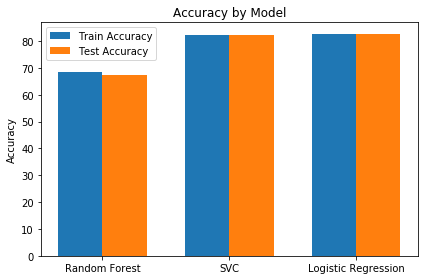

In [87]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['Random Forest', 'SVC', 'Logistic Regression']
train = [68.6, 82.4, 82.6]
test = [67.5, 82.2, 82.8]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train, width, label='Train Accuracy')
rects2 = ax.bar(x + width/2, test, width, label='Test Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()